# Laboratorio 10

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

%matplotlib inline

In [3]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
target_names = breast_cancer.target_names

## Ejercicio 1

(1 pto.)

Ajusta una regresión logística a los datos de entrenamiento y obtén el _accuracy_ con los datos de test. Utiliza el argumento `n_jobs` igual a $-1$, si aún así no converge aumenta el valor de `max_iter`.

Hint: Recuerda que el _accuracy_ es el _score_ por defecto en los modelos de clasificación de scikit-learn.

In [4]:
lr = LogisticRegression(max_iter=500, n_jobs=-1)
lr.fit(X_train, y_train)

print(f"Logistic Regression accuracy: {lr.score(X_test, y_test):0.3f}")

Logistic Regression accuracy: 0.965


## Ejercicio 2

(1 pto.)

Utiliza `GridSearchCV` con 5 _folds_ para encontrar el mejor valor de `n_neighbors` de un modelo KNN.

In [4]:
knn = KNeighborsClassifier(n_neighbors=1) # creo que no es necesario dar un n_neighbors inicial
knn_grid = {"n_neighbors": np.arange(2, 31)}

knn_cv = GridSearchCV(
    estimator = knn,
    param_grid = knn_grid,
    cv=5
)

knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 8}

In [5]:
print(f"KNN accuracy: {knn_cv.score(X_test, y_test):0.3f}")

KNN accuracy: 0.965


## Ejercicio 3

(1 pto.)

¿Cuál modelo escogerías basándote en los resultados anteriores? Justifica

__Respuesta:__ Ambos tienen igual precisión, aunque por simplicidad eligiría el de regresión logística.

## Ejercicio 4

(1 pto.)

Para el modelo seleccionado en el ejercicio anterior.

* Grafica la matriz de confusión (no olvides colocar los nombres originales en los _labels_).
* Imprime el reporte de clasificación.

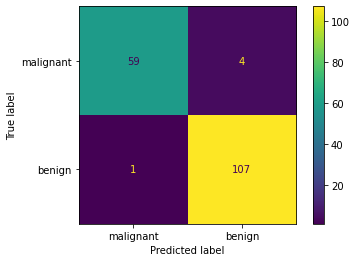

In [6]:
plot_confusion_matrix(lr, X_test, y_test, display_labels=target_names)

In [7]:
y_pred = lr.predict(X_test)
print(classification_report(y_pred, y_test, target_names=breast_cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.94      0.98      0.96        60
      benign       0.99      0.96      0.98       111

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



#### Quise hacer lo mimso para el modelo KNN, dado que tuvieron igual score.

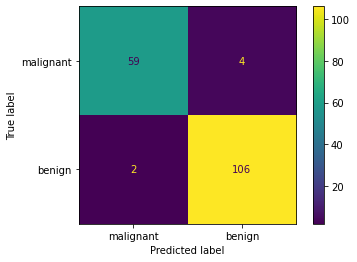

In [8]:
plot_confusion_matrix(knn_cv, X_test, y_test, display_labels=target_names)

In [9]:
y_pred = knn_cv.predict(X_test)
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Puede que la precisión para los tumores (o cáncer?) malignos al ser mayor en el modelo KNN, lo haga un mejor modelo.